# Analisi di serie temporali sull'andamento della camminata
# Paziente S008 - Camminata Normale


In [1]:
# imports 

import pandas as pd
import numpy as np
import tstools.analysis as ts_analysis
import tstools.plot as ts_plot
import tstools.data_manipulation as ts_data
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import math as math
import scipy.fftpack as sft

import sys
sys.path.insert(1, '../../python_modules/')
import helper as helper
import project_analysis as analysis
import method_analysis as method_analysis

## Analisi del paziente sano S008 con camminata normale

- Osservazione : i dati vengono forniti già filtrati 

In [2]:
# read the filtered dataset
dataset_path = '../../datasets/008/S008_N_2-filtered.csv'
dataset = pd.read_csv(dataset_path)

In [3]:
dataset.head()

,Unnamed: 0,x_naso,y_naso,l_naso,x_torace,y_torace,l_torace,x_spalla_dx,y_spalla_dx,l_spalla_dx,...,l_piede_sx_3,x_piede_dx_1,y_piede_dx_1,l_piede_dx_1,x_piede_dx_2,y_piede_dx_2,l_piede_dx_2,x_piede_dx_3,y_piede_dx_3,l_piede_dx_3
0,0,-9.948757,-1.051399,0.005228,-11.368335,-0.527843,-0.001962,-10.989784,-0.574746,-0.005519,...,-0.006810,-22.994900,1.001854,0.028244,-21.313520,1.258677,0.021214,-21.984711,2.151107,0.011988
1,1,-10.227006,-0.223275,0.039886,-9.560996,-0.740927,0.042539,-10.563123,-0.499208,0.026160,...,0.016531,-28.944224,1.869861,0.041114,-29.394404,2.305646,0.038826,-27.561167,1.480878,0.017237
2,2,-10.430395,0.596053,0.073357,-7.724233,-0.927346,0.085765,-10.077557,-0.401688,0.057090,...,0.038881,-34.637301,2.795643,0.054028,-36.593487,3.317780,0.055081,-32.889112,0.977815,0.023017
3,3,-10.539779,1.373816,0.104550,-5.908188,-1.085606,0.126400,-9.540093,-0.288865,0.086396,...,0.059428,-39.757445,3.769687,0.066241,-42.379061,4.260676,0.068925,-37.666317,0.691344,0.029155
4,4,-10.534303,2.079716,0.132466,-4.156823,-1.214397,0.163233,-8.954653,-0.167110,0.113270,...,0.077433,-43.994952,4.777772,0.077019,-46.278610,5.102630,0.079408,-41.599008,0.656199,0.035443


### Analisi

- Vengono eliminati inoltre i valori nulli presenti 

In [4]:
y_piede_dx_1 = helper.delete_nan(dataset.y_piede_dx_1)
y_piede_dx_2 = helper.delete_nan(dataset.y_piede_dx_2)
y_piede_dx_3 = helper.delete_nan(dataset.y_piede_dx_3)

print("Il numero di elementi nulli presenti nella colonna è : {}".format(y_piede_dx_1.count('NaN')))

Il numero di elementi nulli presenti nella colonna è : 0


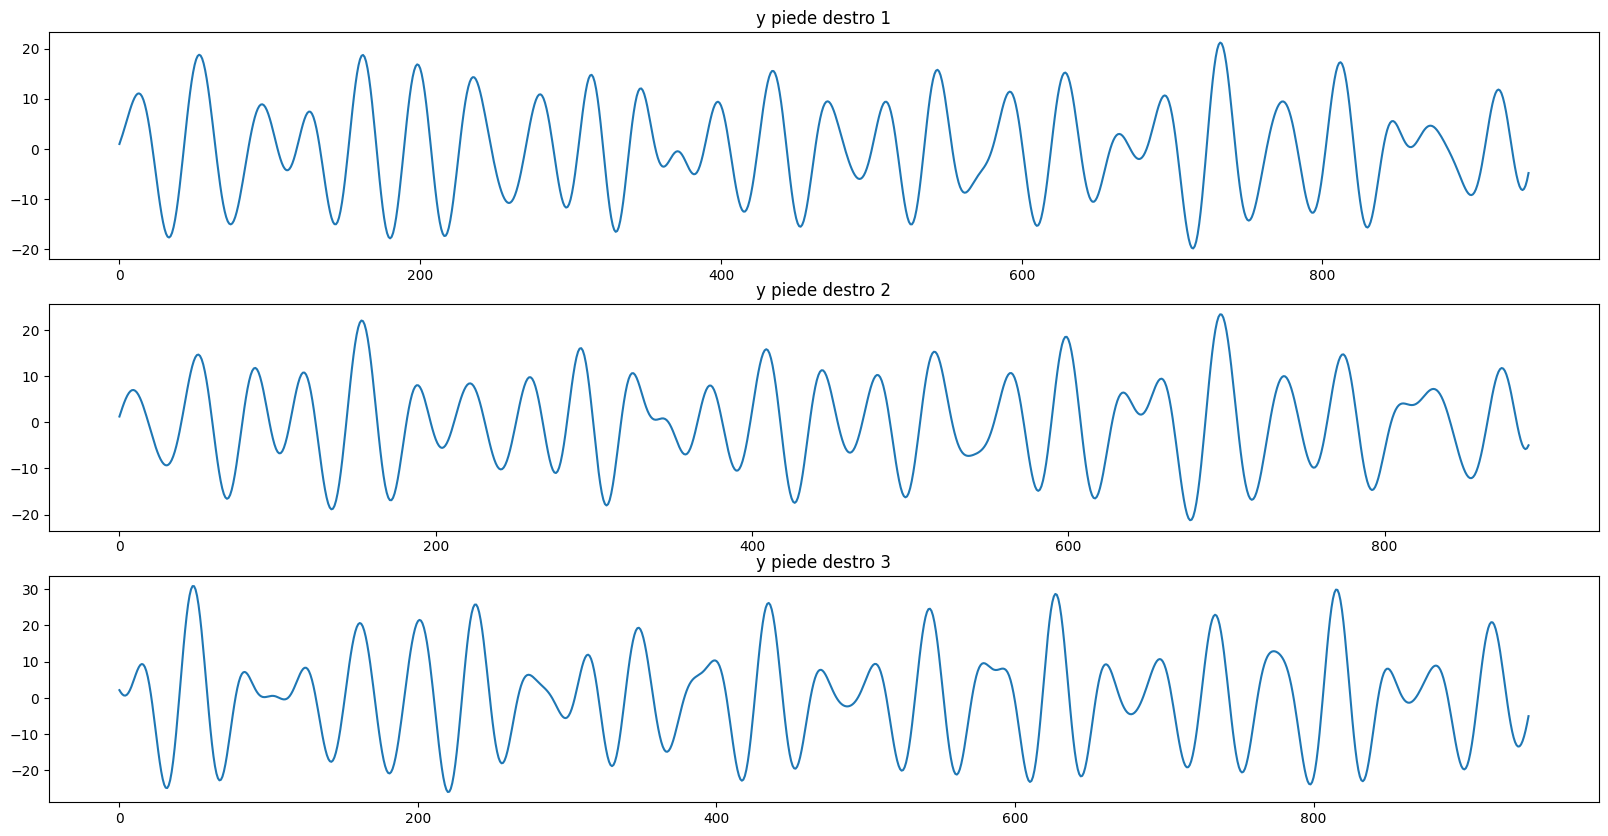

In [5]:
plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
plt.title('y piede destro 1')
plt.plot(y_piede_dx_1)

plt.subplot(3,1,2)
plt.title('y piede destro 2')
plt.plot(y_piede_dx_2)

plt.subplot(3,1,3)
plt.title('y piede destro 3')
plt.plot(y_piede_dx_3)

In [14]:
periods = helper.intspace(300).tolist()
best_error, best_period, all_error_in_range = method_analysis.method_1([y_piede_dx_1, y_piede_dx_2, y_piede_dx_3], periods[36:100])
print('[--] error: {}  |  best period: {} | Number of errors finded:  {} '.format(best_error, best_period , len(all_error_in_range)))

[--] error: 0.00027157808090950904  |  best period: 63 | Number of errors finded:  64 


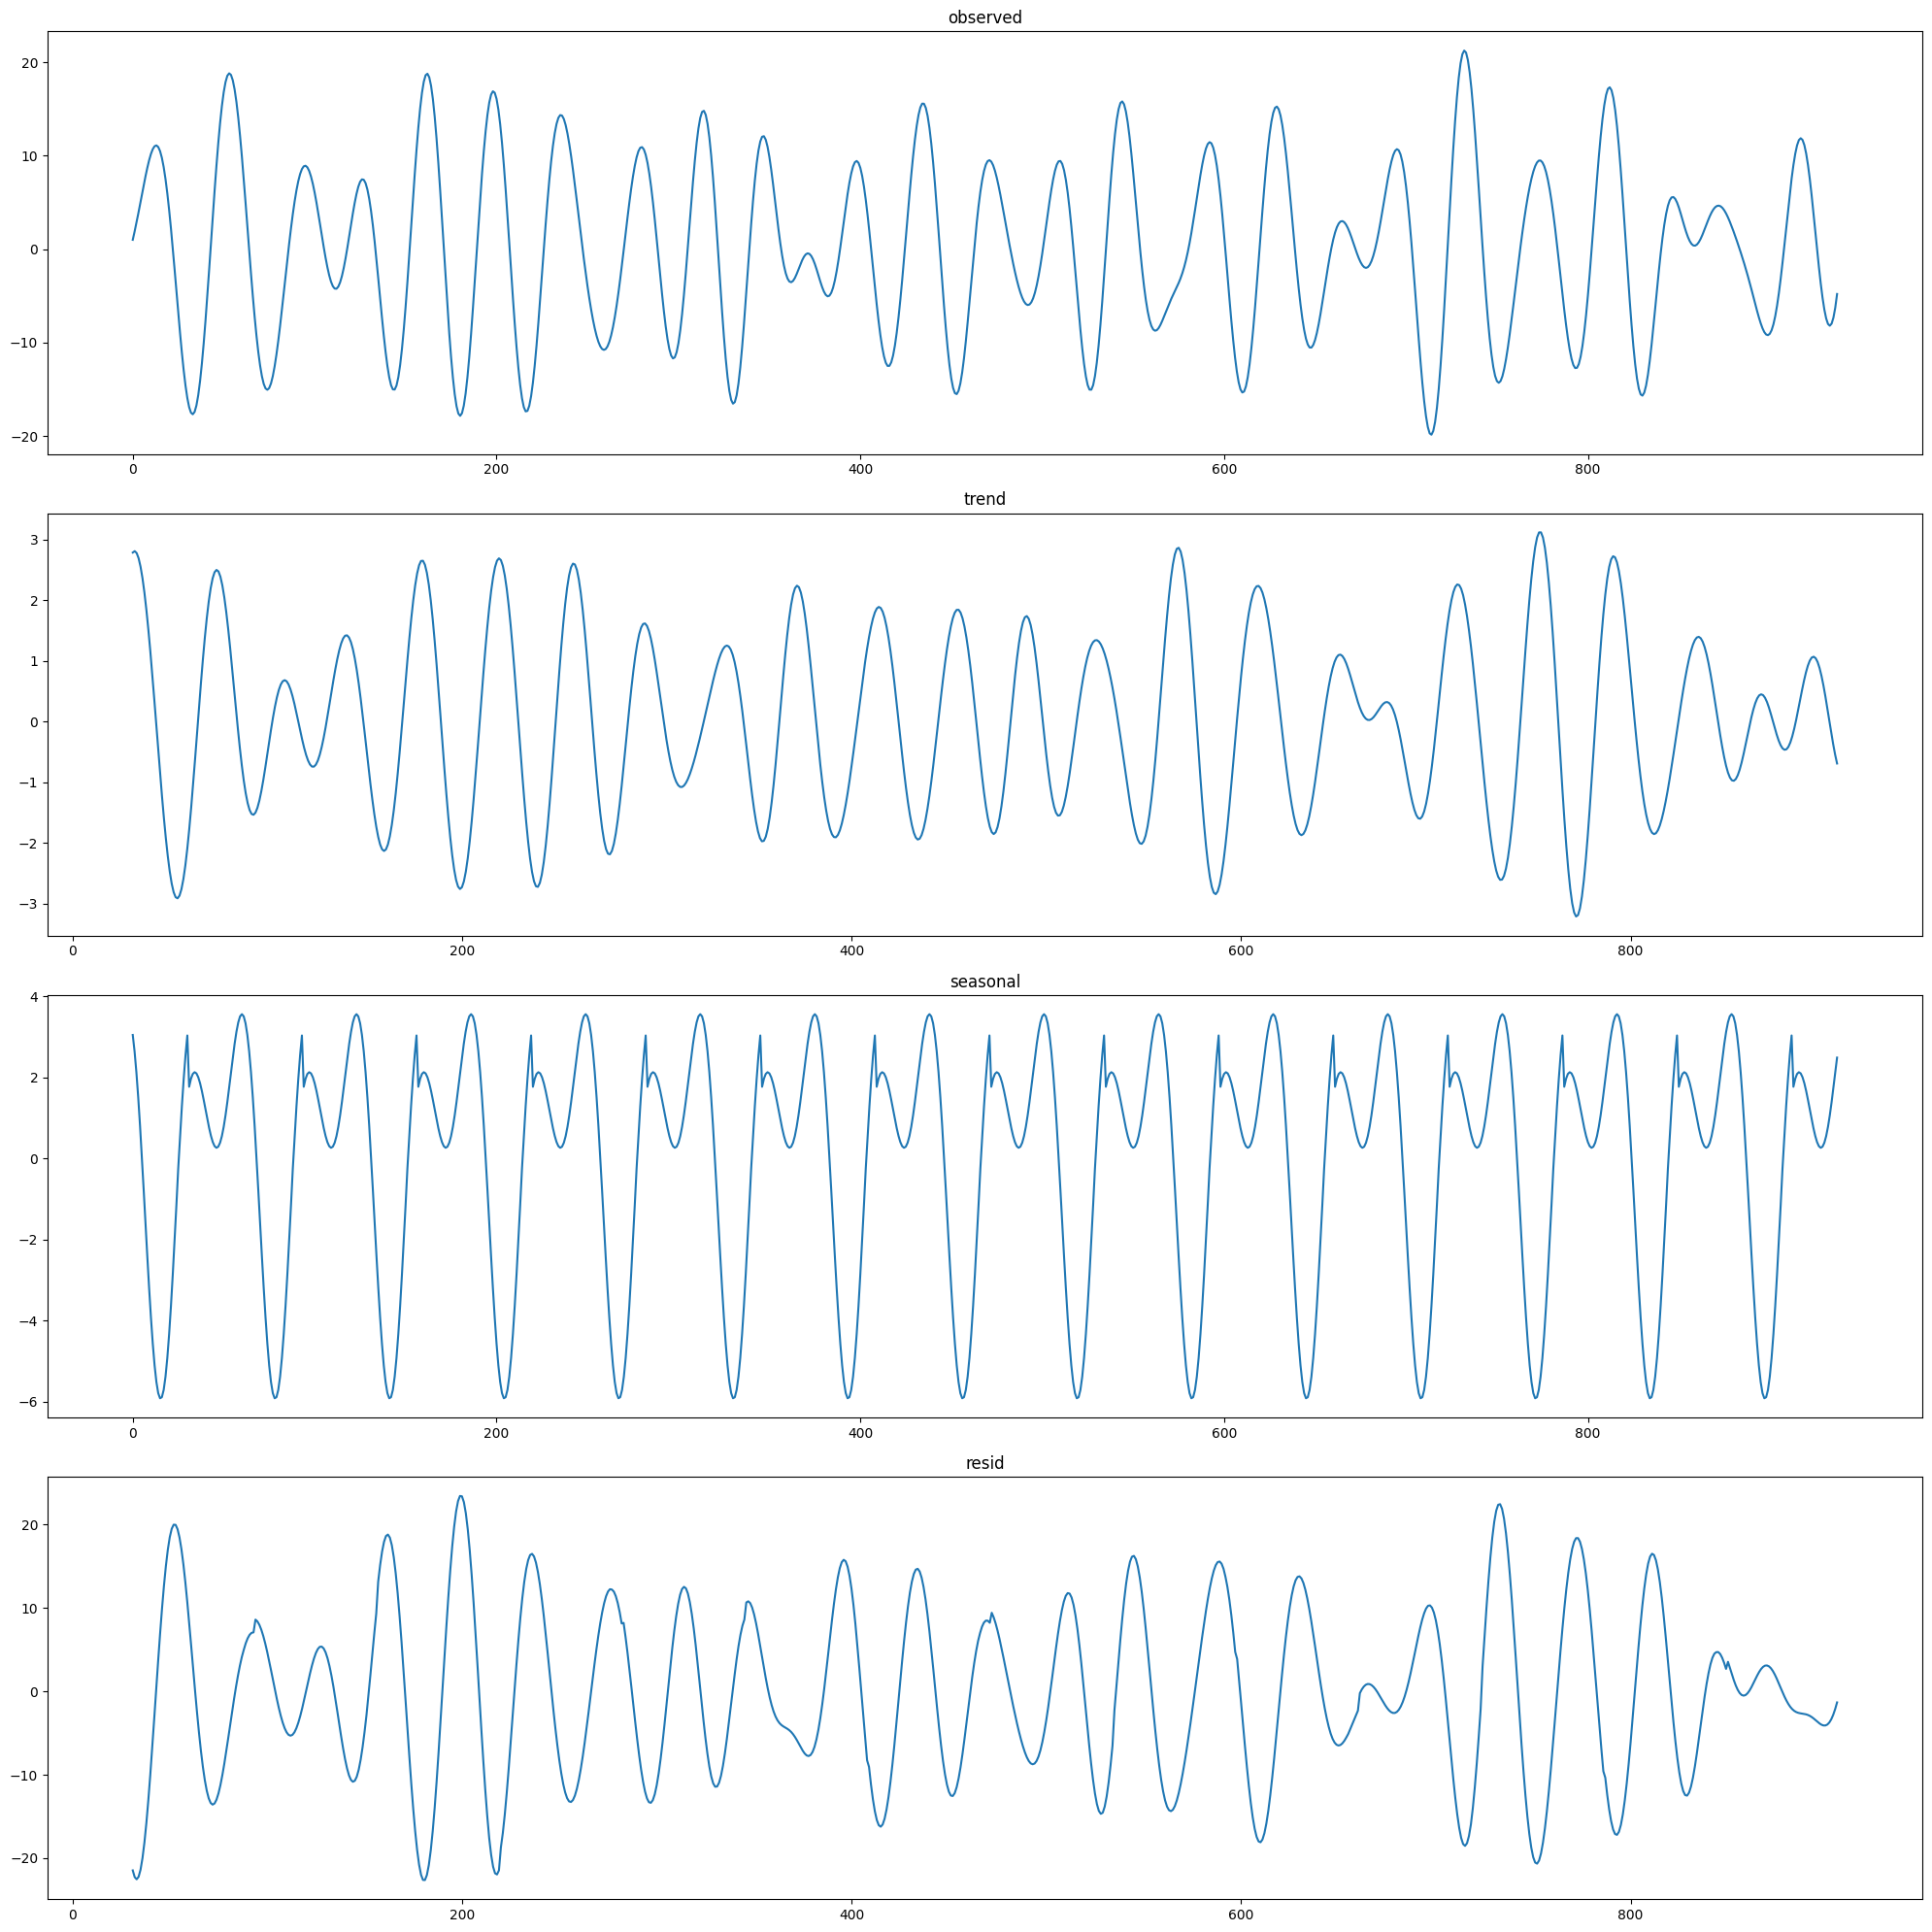

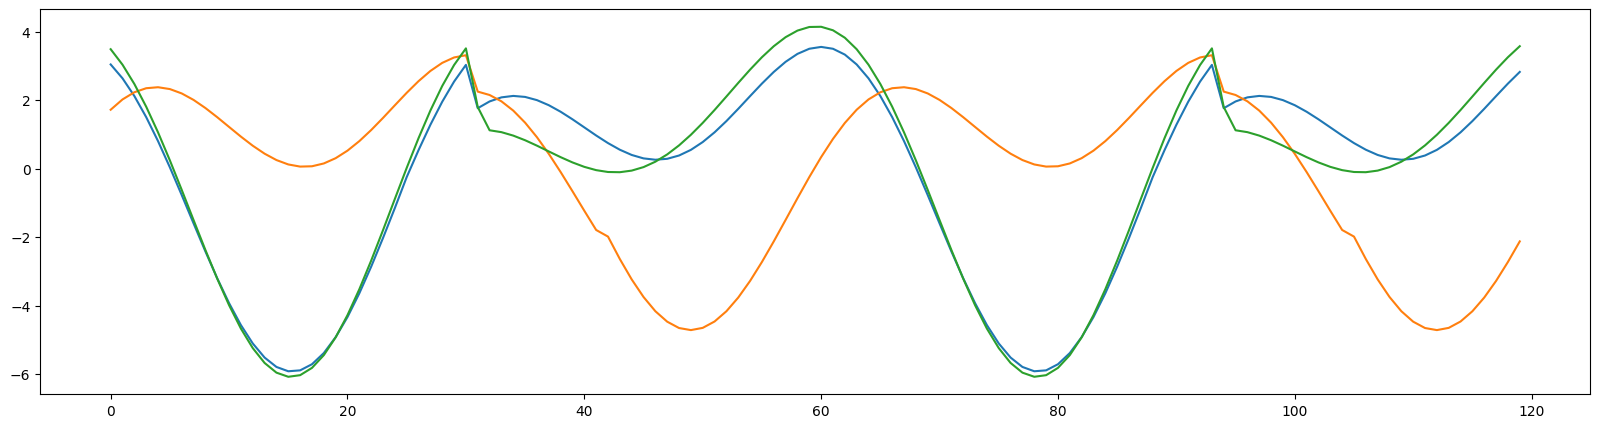

In [15]:
period = best_period
s1 = seasonal_decompose(y_piede_dx_1, period=period).seasonal
s2 = seasonal_decompose(y_piede_dx_2, period=period).seasonal
s3 = seasonal_decompose(y_piede_dx_3, period=period).seasonal

ts_plot.plot_seasonalDecompose(y_piede_dx_1, period=period)

ts_plot.plot_single([s1[:120], s2[:120], s3[:120]])

### Prova : 
- Divide la colonna in due e si esegue la stessa procedura sopra

In [16]:
# si procede scegliendo una colonna , eliminando i valori nulli
y_piede_dx_1 = helper.delete_nan(dataset.y_piede_dx_1)

In [17]:
# La si suddivide in due parti
middle_index = len(y_piede_dx_1)//2

first_half=y_piede_dx_1[:middle_index]

#Split the list from middle index index upto the last index in second half
sec_half=y_piede_dx_1[middle_index:]

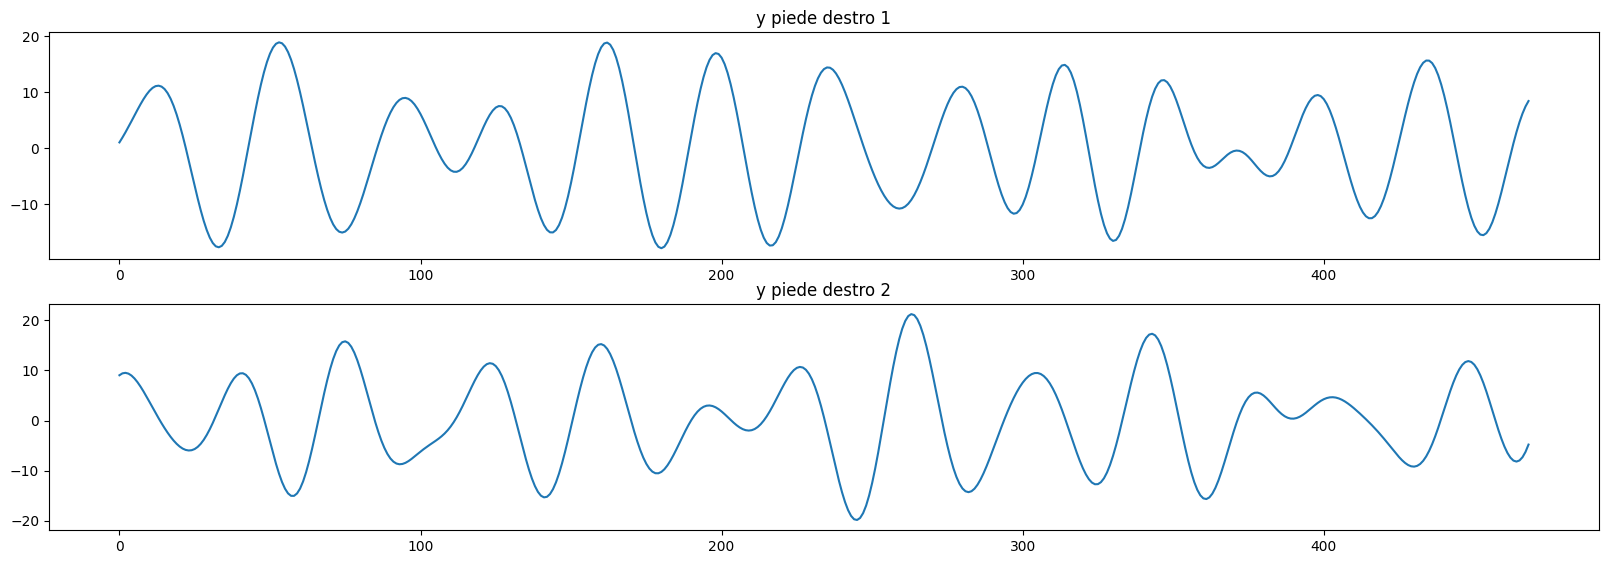

In [18]:
plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
plt.title('y piede destro 1')
plt.plot(first_half)

plt.subplot(3,1,2)
plt.title('y piede destro 2')
plt.plot(sec_half)


[--] error: 0.00017571281403945478  |      Best period: 37    | Number of errors finded:  66 
Tutti gli errori in seguito plottati:
 [0.002456160817462334, 0.0015672798757923078, 0.00020814998791262156, 0.00017571281403945478, 0.004235529861016682, 0.010527703268635091, 0.011347934644571272, 0.011114459401621353, 0.0004662639289654028, 0.0012450863066581315, 0.012433989676656201, 0.029363656302547052, 0.01743917528411451, 0.0033520642016633745, 0.0005288534793723057, 0.003408146325342464, 0.004453655327763537, 0.002847333199818739, 0.0008878984742939451, 0.0008673256212466736, 0.0022470770467174126, 0.005270476491550227, 0.004993849364951105, 0.009652588831958894, 0.01652747624100528, 0.005995408871948636, 0.00094988021220742, 0.0020677998833934902, 0.0010886442214135138, 0.0010368702614215119, 0.0017713365675728517, 0.0007588036686880787, 0.0008227237175109947, 0.003161964867008528, 0.004573147916936359, 0.004612282118574008, 0.003533844684854271, 0.0024154133139147093, 0.002266540690

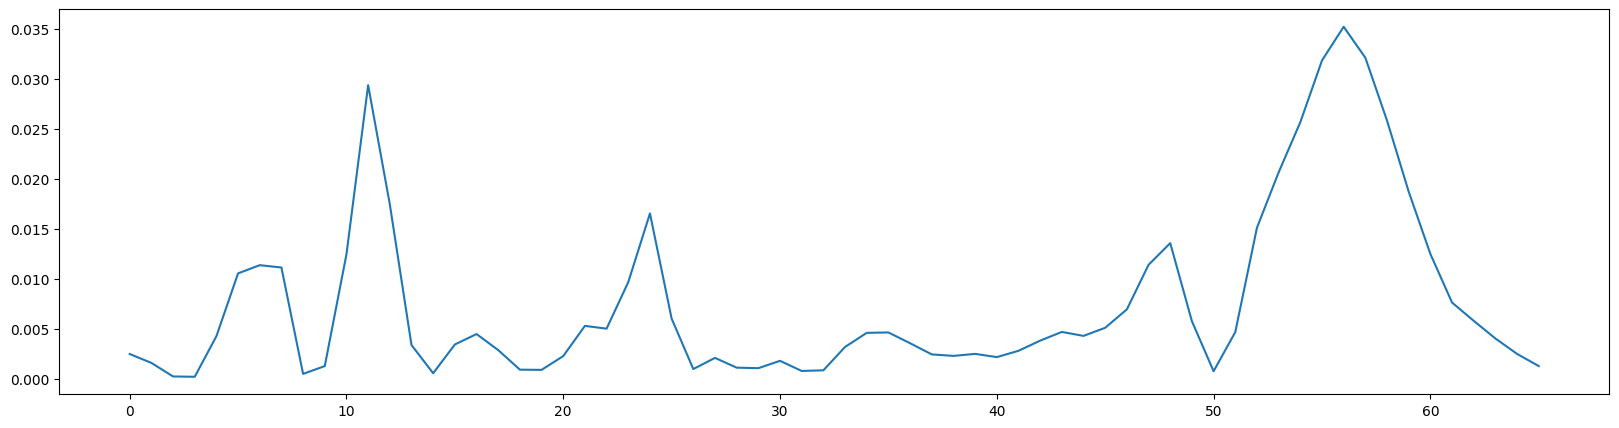

In [19]:
best_error, best_period, all_error_in_range = method_analysis.method_1([first_half, sec_half], periods[34:100])
print('[--] error: {}  |      Best period: {}    | Number of errors finded:  {} '.format(best_error, best_period , len(all_error_in_range)))
print("Tutti gli errori in seguito plottati:\n {} ".format(all_error_in_range))
ts_plot.plot_single([all_error_in_range])

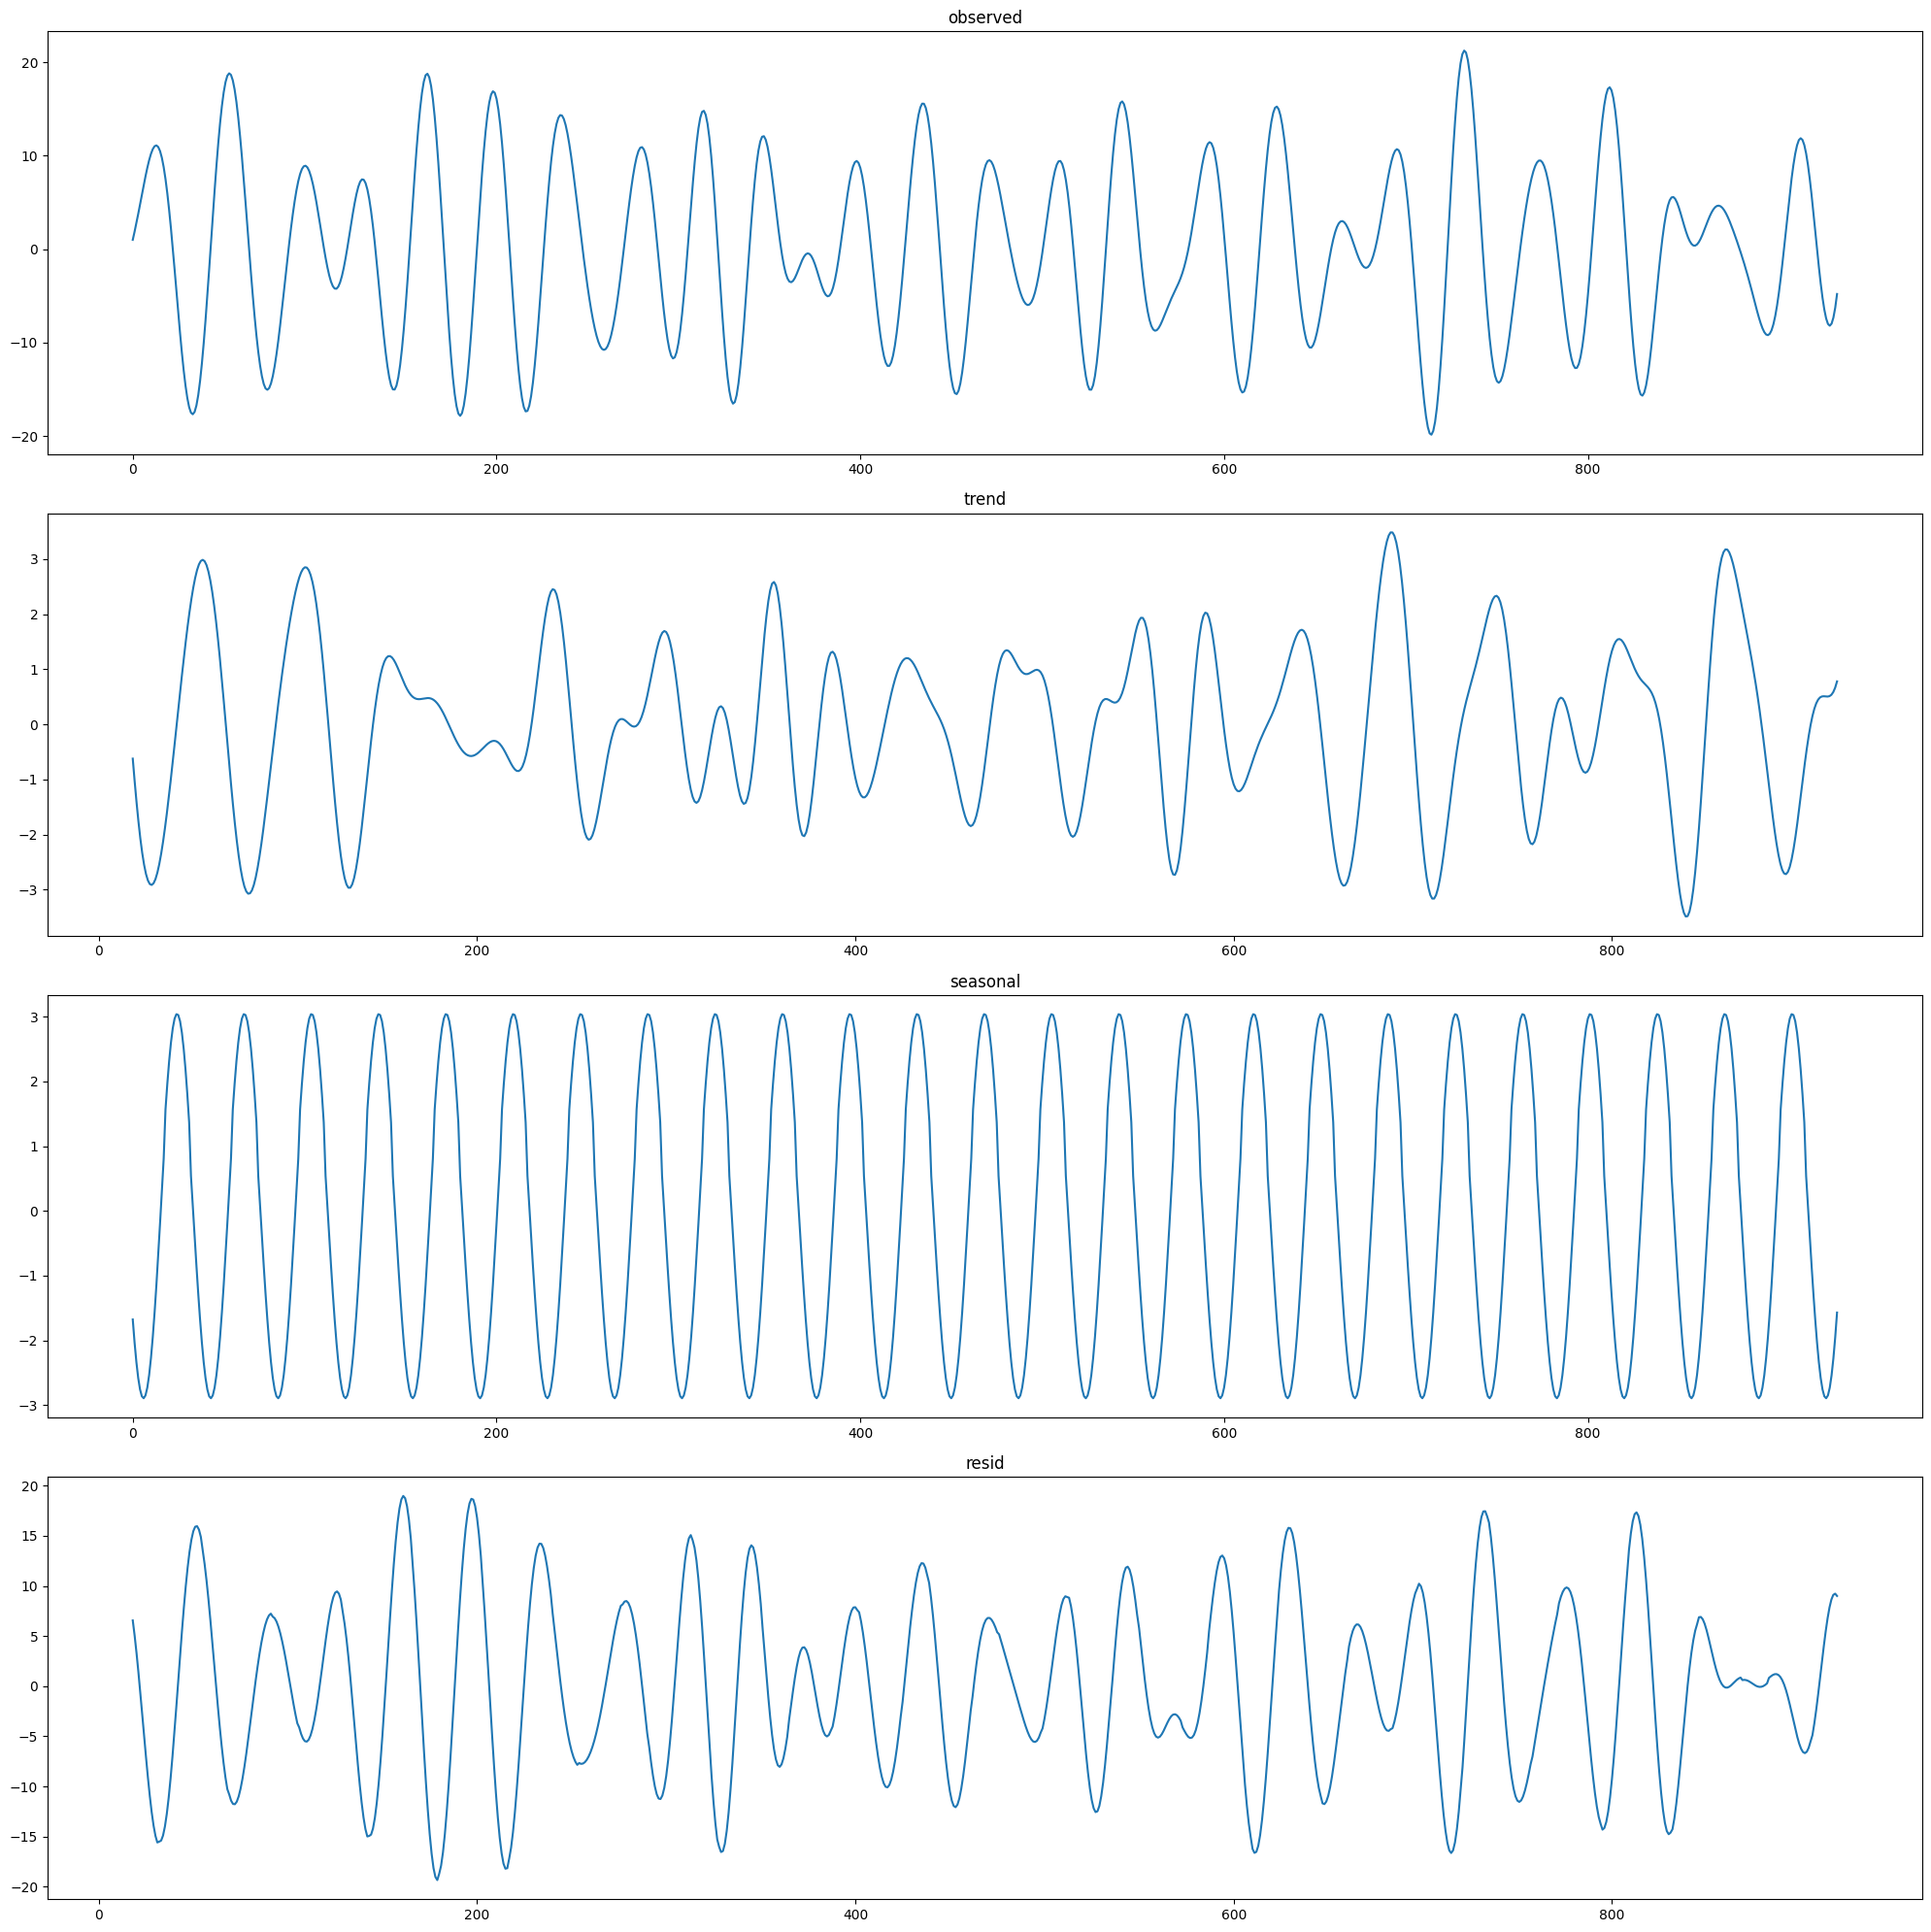

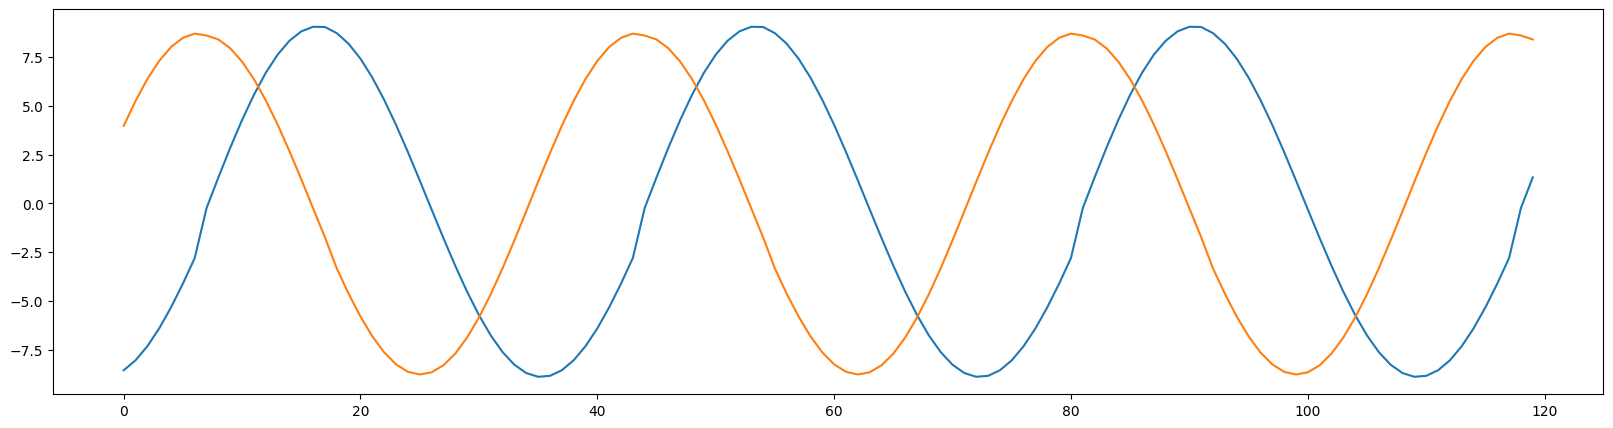

In [21]:
period = best_period
s1 = seasonal_decompose(first_half, period=period).seasonal
s2 = seasonal_decompose(sec_half, period=period).seasonal

ts_plot.plot_seasonalDecompose(y_piede_dx_1, period=period)

ts_plot.plot_single([s1[:120], s2[:120]])